***Feature Selection***

In [ ]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
from sklearn.feature_selection import SelectPercentile

In [2]:
# Load data into dataframe and check out the dimension of the data
df = pd.read_csv('divorce.csv', sep=';')
print("The dimension of the table is: ", df.shape)

The dimension of the table is:  (170, 55)


In [3]:
df.head()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


In [19]:
# I have categorical features and a binary target, I choose to evaluate the chi-square statistic to identify 
# independent variables for removal during feature selection

# retrieve numpy array
csDat = df.values

# Identify data and target features
features = csDat[:, :-1]
target = csDat[:,-1]

In [23]:
# Since I don't really know how many KBest to designate and my features are quantitative, I decided to use f_classif to 
# calculate ANOVA F-value statistic for each feature and the target and identify a percentile of best features.

# Select top 75% of features with highest F-values
fvalue_selector = SelectPercentile(f_classif, percentile=75)
features_kbest = fvalue_selector.fit_transform(features, target)

# Show results
print("Original number of features:", features.shape[1])
print("Reduced number of features:", features_kbest.shape[1])

Original number of features: 54
Reduced number of features: 40


In [ ]:
# Not sure where to go from here...how to figure out which features were the top 40, but features_kbest is an array 
# That contains the 75% best performing features.

In [51]:
# Take a different approach to identify the KBest
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(features, target)

SelectKBest(k='all', score_func=<function chi2 at 0x000002288888E700>)

In [55]:
# Print the scores of each feature. The higher the better.
for i in range(len(fs.scores_)):
    print('Feature {}: {}'.format (i+1, fs.scores_[i]))

Feature 1: 186.8848063482285
Feature 2: 148.5646677937914
Feature 3: 124.86272609819119
Feature 4: 173.30274965283266
Feature 5: 233.04633621600595
Feature 6: 32.7564330621463
Feature 7: 82.000006591784
Feature 8: 210.3169282777606
Feature 9: 234.06994829064408
Feature 10: 151.00039875373955
Feature 11: 229.05224165673073
Feature 12: 166.52922248101427
Feature 13: 143.62384643779984
Feature 14: 181.5312586841199
Feature 15: 198.39810079593195
Feature 16: 203.4334621646305
Feature 17: 230.17948081326384
Feature 18: 232.75429017830314
Feature 19: 239.13623048619291
Feature 20: 230.19977315757507
Feature 21: 191.86480329222738
Feature 22: 193.4412440711256
Feature 23: 218.19773209671462
Feature 24: 178.25841229623688
Feature 25: 178.36037116550926
Feature 26: 194.78408817337026
Feature 27: 193.88834836260082
Feature 28: 199.8353860505023
Feature 29: 228.67468019985873
Feature 30: 195.78990634891568
Feature 31: 135.61506121484865
Feature 32: 148.6996124031008
Feature 33: 221.26349735409656

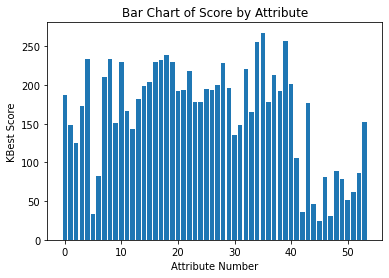

In [54]:
# Plot feature scores as a bar graph
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.title("Bar Chart of Score by Attribute")
plt.xlabel("Attribute Number")
plt.ylabel("KBest Score")
plt.show()

In [34]:
# Looking at the bar graph, I would choose a score of >100 as a point to separate valuable/less valuable features. 
# Now I just want to look at the array of scores in descending order.
fsScore_desc = np.sort(fs.scores_)[::-1]
fsScore_desc

array([267.48902924, 256.79032157, 255.47433633, 239.13623049,
       234.06994829, 233.04633622, 232.75429018, 230.19977316,
       230.17948081, 229.05224166, 228.6746802 , 221.26349735,
       218.1977321 , 213.48922018, 210.31692828, 203.43346216,
       200.95660156, 199.83538605, 198.3981008 , 195.78990635,
       194.78408817, 193.88834836, 193.44124407, 192.1763137 ,
       191.86480329, 186.88480635, 181.53125868, 178.36037117,
       178.2584123 , 177.74183863, 177.31870197, 173.30274965,
       166.52922248, 164.94121933, 152.05241949, 151.00039875,
       148.6996124 , 148.56466779, 143.62384644, 135.61506121,
       124.8627261 , 106.1025706 ,  88.92747768,  86.45775237,
        82.00000659,  80.75414852,  78.33819472,  62.11258551,
        52.00261993,  46.17412453,  36.41244162,  32.75643306,
        30.63950399,  24.49837459])

In [58]:
# Total number of scores <100 is 12. With 54 total features, that leaves 42 features that scored above 100, which is very
# close to the top 75% number of 40 features. 

# Remove 12 features that scored <100
clean_df = df.drop(['Atr6', 'Atr7', 'Atr43', 'Atr45', 'Atr46', 'Atr47', 'Atr48', 'Atr49', 'Atr50',
                    'Atr51', 'Atr52', 'Atr53'], axis=1)

# Show results
clean_df.head()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr8,Atr9,Atr10,Atr11,Atr12,...,Atr36,Atr37,Atr38,Atr39,Atr40,Atr41,Atr42,Atr44,Atr54,Class
0,2,2,4,1,0,0,0,0,1,0,...,1,2,1,3,3,2,1,2,1,1
1,4,4,4,4,4,4,4,4,4,3,...,2,3,4,2,4,2,2,4,2,1
2,2,2,2,2,1,1,1,2,3,4,...,1,2,1,3,3,3,3,3,2,1
3,3,2,3,2,3,3,3,3,4,3,...,1,3,3,4,4,2,2,2,2,1
4,2,2,1,1,1,0,0,0,0,1,...,0,0,0,2,1,0,2,0,0,1
